# Final project, Numerical Analysis 2018-2019


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [228]:
%pylab inline

# # input image dimensions
img_rows, img_cols = 28, 28

# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
# import keras
# from keras.datasets import mnist

## the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#     input_shape = (img_rows, img_cols)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib


/home/lbonaldo/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['short', 'ones', 'norm', 'dist', 'long', 'matrix', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

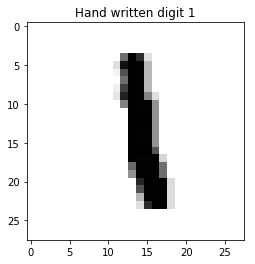

In [229]:
# Show image number 15, and write in the title what digit it should correspond to
N=6
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

##### **IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

## Solution
Before starting implementing the three norms I import some modules that will be needed for this project. Moreover, a context manager is introduced to measure the execution time both of functions and peaces of code.

In [27]:
import time
import sys
import scipy
from scipy import integrate

In [4]:
from contextlib import ContextDecorator

class mytimer(ContextDecorator):
    def __enter__(self):
        print('Start.')
        self.start = time.perf_counter()
        return self
    
    def __exit__(self, *args):
        self.end = time.perf_counter()
        self.interval = self.end - self.start
        print('Elasped time: ', self.interval)
        print('Finish.')
        return False

#use: 
#@mytimer()
#def func1():

#or

#with mytimer() as t:
#     code

In [235]:
def d_infty(image1, image2): 
    return abs(image1-image2).max()

def d_one(image1, image2):
    return (abs(image1-image2).sum())

def d_two(image1, image2):
    return sqrt((abs(image1-image2)**2).sum())

The following functions are just the equavalent of the prevoius ones with the addition of the execution time.

In [6]:
@mytimer()
def t_d_infty(a_array, b_array): 
    return amax(abs(b_array-a_array))

@mytimer()
def t_d_one(a_array, b_array):
    return (abs(b_array-a_array).sum())

@mytimer()
def t_d_two(a_array, b_array):
    return sqrt(square(b_array-a_array).sum())

In particular, these three functions were used to study the performances and the correctness of the implemented norms. Here are just very few and simple examples of that:

In [7]:
diff_infty = t_d_infty(x_train[6], x_train[8])
print(diff_infty)
diff_one = t_d_one(x_train[6], x_train[8])
print(diff_one)
diff_two = t_d_two(x_train[6], x_train[8])
print(diff_two)

Start.
Elasped time:  8.080399999244037e-05
Finish.
1.0
Start.
Elasped time:  3.716199999814762e-05
Finish.
32.533333
Start.
Elasped time:  3.603199999702156e-05
Finish.
4.5523653


# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

## Solution

In the following cell a function that computes the distance between each elements of a squared matrix is implemented. The distance is compited pairwise. The function takes three arguments, a matrix, the number of elements on which to compute the distance and the chosen norm. 
The second function is just a repetition of the first one which could take advantage of the loop unrolling optimization.  

In [233]:
@mytimer()
def dist(N, matrix, norm):
    buffer = matrix[:N]
    D = zeros([N,N])
    for i in range(N-1):
        for j in range(i+1, N):
            D[i,j] = norm(buffer[i], buffer[j])
    return D+D.T

@mytimer()
def dist_all(N, matrix):
    buf = matrix[0:N]
    D1 = zeros([N,N])
    D2 = zeros([N,N])
    D3 = zeros([N,N])
    for i in range(N-1):
        for j in range(i+1, N):
            D1[i,j] = d_infty(buf[i], buf[j])
            D2[i,j] = d_one(buf[i], buf[j])
            D3[i,j] = d_two(buf[i], buf[j])
    return (D1+D1.T, D3+D3.T, D2+D2.T)

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

In [98]:
with mytimer() as t:
    D_infty = dist(100, x_train, d_infty)
    D_one = dist(100, x_train, d_one)
    D_two = dist(100, x_train, d_two)

Start.
Start.
Elasped time:  0.07199885600039124
Finish.
Start.
Elasped time:  0.06788928300011321
Finish.
Start.
Elasped time:  0.09569348100012576
Finish.
Elasped time:  0.2360653209998418
Finish.


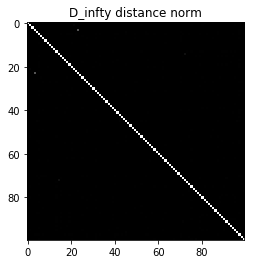

In [11]:
imshow(D_infty, cmap='gray_r')
_ = title('D_infty distance norm')

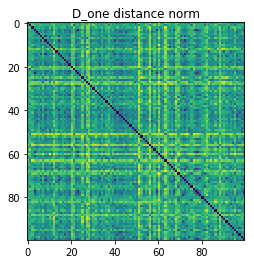

In [12]:
imshow(D_one)
_ = title('D_one distance norm')

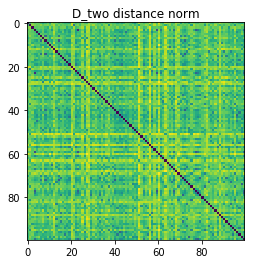

In [13]:
imshow(D_two)
_ = title('D_two distance norm')

As we can see from these pictures, the $\infty$-norm is not able to "see" the distances between the handwritten digits and, in fact, as we will see in a while, it has an efficiency which is less than 50%.

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

## Solution

Here is the implemented **leave one out** function for computing the efficiency of the classification algorithm.

In [99]:
@mytimer()
def leave_one_out(N, mat_dist):
    error_counter = 0.0
    for i in range(N):
        index = argsort(mat_dist[i,:N])[1]
        if y_train[index] != y_train[i]:
            error_counter += 1
    return error_counter/N

Just as a comment, I leave a pseudo-code of an attempt to improve the reliability of the computation of the efficienty. Unfortunately, I could not have the time to finish and test it, but the idea was to take as 'k', the index of the most probable digit rather that to the first that minimize the distance. Assuming 'k' as a random variables, one sigma is taken as the threshold.  

#it has to be fixed.
@mytimer()
def leave_one_out_impr(N, mat_dist):
    error_counter = 0
    for i in range(N):
        index = list(where(mat_dist[i,:] == mat_dist[i,:].min())[0])
        tmp_count = 0
        for j in index:
            if y_train[j] != y_train[i]:
                continue
            else:
                tmp_count += 1
        if (tmp_count < (len(index)*0.68)):
            error_counter += 1
        else: 
            continue
    return error_counter/N

Some simple tests:

In [ ]:
N = 100
error_infty = leave_one_out(N,D_infty)
error1 = leave_one_out(N,D_one)
error2 = leave_one_out(N,D_two)

In [103]:
print('error_infty: ', error_infty)
print('error1: ', error1)
print('error2: ', error2)

error_infty:  0.57
error1:  0.17
error2:  0.17


# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

** In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance **

## Solution

In [241]:
#I create the matrix with 1600 values. For the other cases slices of this matrix will be used.
with mytimer() as t:
    D_infty = dist(1600, x_train, d_infty)
    D_one = dist(1600, x_train, d_one)
    D_two = dist(1600, x_train, d_two)

Start.
Start.
Elasped time:  20.62821505699685
Finish.
Start.
Elasped time:  41.35824808400503
Finish.
Start.
Elasped time:  44.25443647799693
Finish.
Elasped time:  106.24184440800309
Finish.


In [260]:
N_dim = [100,200,400,800,1600]
matrices = [D_infty, D_one, D_two] 

eff = np.empty([len(N_dim),len(matrices)])

with mytimer() as t:
    for i,dim in enumerate(N_dim):
        for j,matrix in enumerate(matrices):
            eff[i,j] = leave_one_out(dim, matrix)
            
print(eff)

Start.
Elasped time:  0.4212527140043676
Finish.
[[0.57    0.17    0.17   ]
 [0.52    0.145   0.135  ]
 [0.445   0.15    0.135  ]
 [0.4075  0.145   0.12875]
 [0.37375 0.1025  0.09375]]


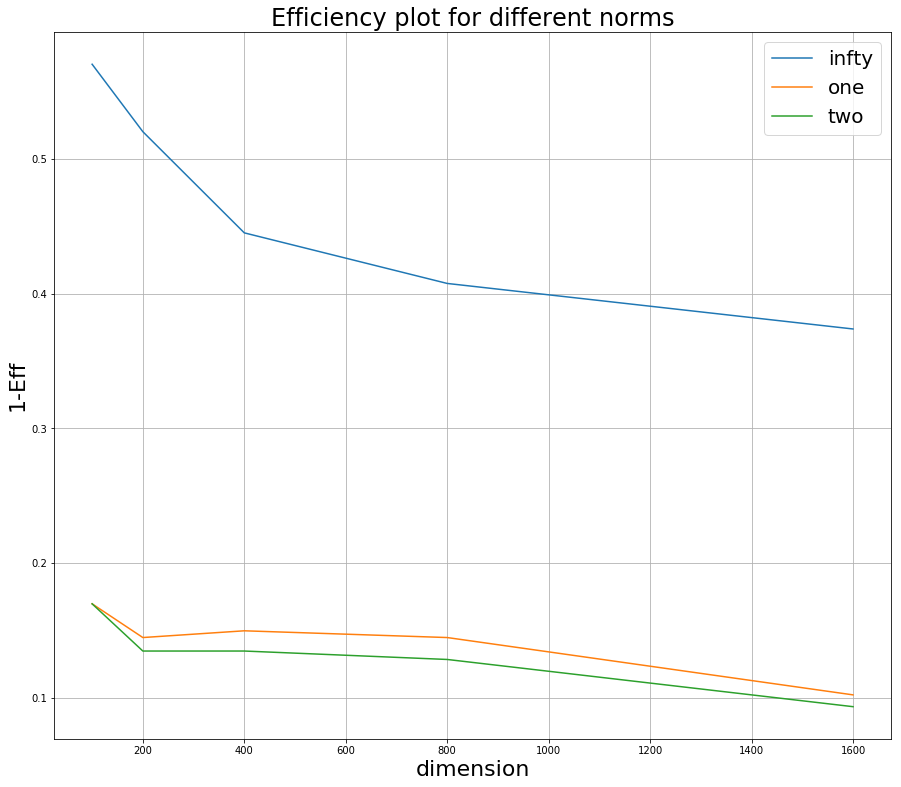

In [261]:
plt.figure(figsize=(15,13))

p1 = plt.plot(N_dim, eff[:,0])
p2 = plt.plot(N_dim, eff[:,1])
p3 = plt.plot(N_dim, eff[:,2])

plt.grid()
plt.title('Efficiency plot for different norms', fontsize=24)
plt.xlabel('dimension', fontsize=22)
plt.ylabel('1-Eff', fontsize=22)
plt.legend((p1[0], p2[0], p3[0]), ('infty', 'one', 'two'), fontsize=20) 

Again, the following could be a further optimization using loop unrolling.

In [240]:
N_dim = [100,200,400,800,1600]

eff = np.empty([len(N_dim),3])

with mytimer() as t:
    for i,dim in enumerate(N_dim): 
        j = 0
        while(j<(len(matrices))):
            eff[i,j] = leave_one_out(dim, D_infty)
            eff[i,j+1] = leave_one_out(dim, D_one)
            eff[i,j+2] = leave_one_out(dim, D_two)
            j += 3
            
print(eff)

Start.
Elasped time:  1.1251168079979834
Finish.
[[0.57    0.17    0.17   ]
 [0.52    0.145   0.135  ]
 [0.445   0.15    0.135  ]
 [0.4075  0.145   0.12875]
 [0.37375 0.1025  0.09375]]


# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

## Solution

In order to compute the new distance matrix, every image has to be normalized with respect to $\Omega$. In addition, the gradient of each image is needed. For performance purposes, I compute all of them outside the distance function. 
In particular, *grad_xy[ ]* is the 2-vector with the x and y component of the gradient of each image. This 2-vector is the one that is passed as an argument to the distance function. 

In [242]:
N = 1600
with mytimer() as t:
    norm_im = np.empty([N,28,28])
    grad_x = np.empty([N,28,28])
    grad_y = np.empty([N,28,28])
    grad_xy = np.empty([N,2,28,28])
    for i in range(N):
        tmp = scipy.integrate.simps(scipy.integrate.simps(x_train[i]))
        norm_im[i] = np.divide(x_train[i], tmp)
        grad_x[i], grad_y[i] = gradient(x_train[i])
        grad_xy[i] = np.array([grad_x[i], grad_y[i]])

Start.
Elasped time:  0.49694064899813384
Finish.


In [244]:
#@mytimer()
def d_h(a, b, grad_a, grad_b):

    diff = a-b
    first = square(grad_a[0] - grad_b[0]) + square(grad_a[1] - grad_b[1])
    second = square(diff)
    
    return sqrt(integrate.simps(integrate.simps(first + second)))

With this function and these arrays I can now obtain the distance matrix for the new norm:

In [112]:
with mytimer() as t:    
    D_h = empty([N,N])
    for i in range(N-1):
        for j in range(i+1, N):
            D_h[i,j] = d_h(norm_im[i], norm_im[j], grad_xy[i], grad_xy[j])
    D_h = D_h + D_h.T

Start.
Elasped time:  694.6892642789999
Finish.


In the following assignment I will compute the efficiency also for this norm.

## Assignment 7

An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

## Solution

In order to solve the Poisson equation I decided to use the finite difference method and to solve the obtained linear system using the conjugate gradient method. 
Let's first construct the $A$ matrix which results from the application of the FD method:

In [83]:
n = 28
A = np.zeros([n*n,n*n])

a = -np.ones((n*n-1,))
b = 4*np.ones((n*n,))
c = -np.ones((n*(n-1),))
A = (diag(a, -1) + diag(b, 0) + diag(a, +1) + diag(c, +n) + diag(c, -n))

print(A.shape)

(784, 784)


As for the previous case, I compute the laplacian for each image outside the distance function in order to increase its performance. 

In [118]:
with mytimer() as t:
    N = 1600
    n=28
    tol = 10e-08
    lap = np.empty([N,n,n])
    for i in range(N):
        phi = np.empty([n,n])
        phi[:,0] = phi[:,-1] = phi[0,:] = phi[-1,:] = 0
        phi = phi.reshape(n*n)
        f = norm_im[i].reshape([n*n])
        phi = scipy.sparse.linalg.cg(A, f, tol=tol)
        lap[i] = phi[0].reshape(n,n)

Start.
Elasped time:  46.90606602000025
Finish.


In [119]:
def d_MA(a, b, lap_a, lap_b):
    
    phi = lap_a-lap_b
    grad_x, grad_y = np.gradient(phi)
    sum_ab = a + b
    integ = sum_ab*(square(grad_x) + square(grad_y))
    
    return integrate.simps(integrate.simps(integ))

Again, the same simple test:

In [120]:
with mytimer() as t:
    long = d_MA(norm_im[0], norm_im[6], lap[0], lap[6]) #diff between 5 and 1
    short = d_MA(norm_im[6], norm_im[8], lap[6], lap[8]) #diff between 1 and 1
    
print(long, short)

Start.
Elasped time:  0.00261538299946551
Finish.
0.0001989125737659481 8.975621979866709e-05


Then, I use the defined matrix to compute the distance matrix:

In [121]:
N=1600

with mytimer() as t:    
    D_ma = empty([N,N])
    for i in range(N-1):
        for j in range(i+1, N):
            D_ma[i,j] = d_MA(norm_im[i], norm_im[j], lap[i], lap[j])
    D_ma = D_ma + D_ma.T

Start.
Elasped time:  699.7223896880005
Finish.


Let's do a simple test if something went wrong:

In [123]:
import math
for i in range(N-1):
    for j in range(i+1, N):
        if math.isnan(yall_d_ma[i,j]):
            print('ERROR!!', i, j)

With these two new metrics the efficiency plot becomes:

In [250]:
print(eff)

[[0.57     0.17     0.17     0.27     0.25    ]
 [0.52     0.145    0.135    0.205    0.2     ]
 [0.445    0.15     0.135    0.1725   0.1475  ]
 [0.4075   0.145    0.12875  0.175    0.135   ]
 [0.37375  0.1025   0.09375  0.13375  0.120625]]


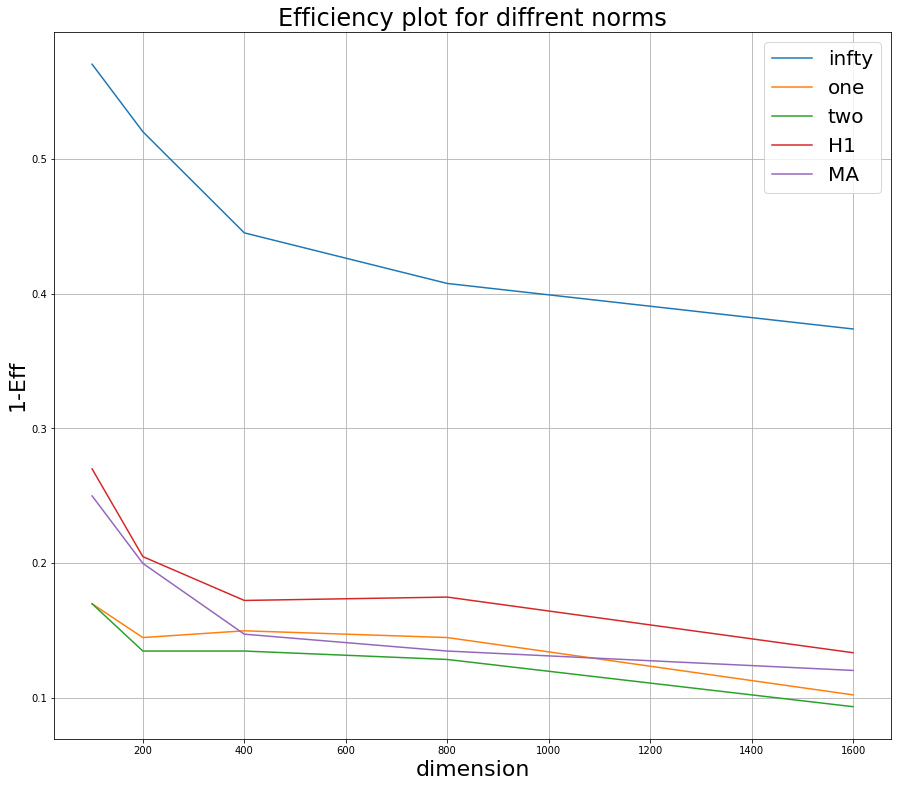

In [252]:
N_dim = [100,200,400,800,1600]
plt.figure(figsize=(15,13))

p1 = plt.plot(N_dim, eff[:,0])
p2 = plt.plot(N_dim, eff[:,1])
p3 = plt.plot(N_dim, eff[:,2])
p4 = plt.plot(N_dim, eff[:,3])
p5 = plt.plot(N_dim, eff[:,4])

plt.grid()
plt.title('Efficiency plot for diffrent norms', fontsize=24)
plt.xlabel('dimension', fontsize=22)
plt.ylabel('1-Eff', fontsize=22)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('infty', 'one', 'two', 'H1', 'MA'), fontsize=20)

## Assigment 8 (optional for DSSC, PhD and LM, Mandatory for MHPC)

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses one of the custom distances defined above**.

For each N in 3200,6400,12800,25600,51200, and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

## Solution

- tree_cr: function that creates a BallTree according to the different metric
- eff_query: compute the efficiency for quering the tree for the nearest neighbor. 

In [163]:
from sklearn.neighbors import BallTree

def tree_cr(N, x_train, my_metric):
    tree = BallTree((x_train[:N]).reshape(N,28*28), leaf_size=(N/2), metric = my_metric)
    return tree

def eff_query(N, tree, x_test, y_test, y_train):
    q_dim = N
    error_counter = 0.0
    for i in range(q_dim):
        distance, k = tree.query((x_test[i]).reshape(1,28*28), k=1)
        if  y_test[i] != y_train[k]:
            error_counter += 1
    return error_counter/q_dim

Let's start computing the efficiency for the $\infty$-norm and for the $d_1$ and $d_2$ norm:

In [164]:
N_dim = [100,200,400,800,1600,3200]
metrics = [d_infty, d_one, d_two] 

eff_balltree = np.empty([len(N_dim), len(metrics)])

with mytimer() as t:
    for i,dim in enumerate(N_dim):
        for j,metric in enumerate(metrics):
            tree = tree_cr(dim, x_train, metric)
            eff_balltree[i,j] = eff_query(dim, tree, x_test, y_test, y_train)

print(eff_balltree)

Start.
Elasped time:  1485.8388240879995
Finish.
[[0.71      0.35      0.33     ]
 [0.62      0.315     0.315    ]
 [0.5825    0.2375    0.2275   ]
 [0.54875   0.19125   0.1825   ]
 [0.475625  0.159375  0.145625 ]
 [0.400625  0.1215625 0.106875 ]]


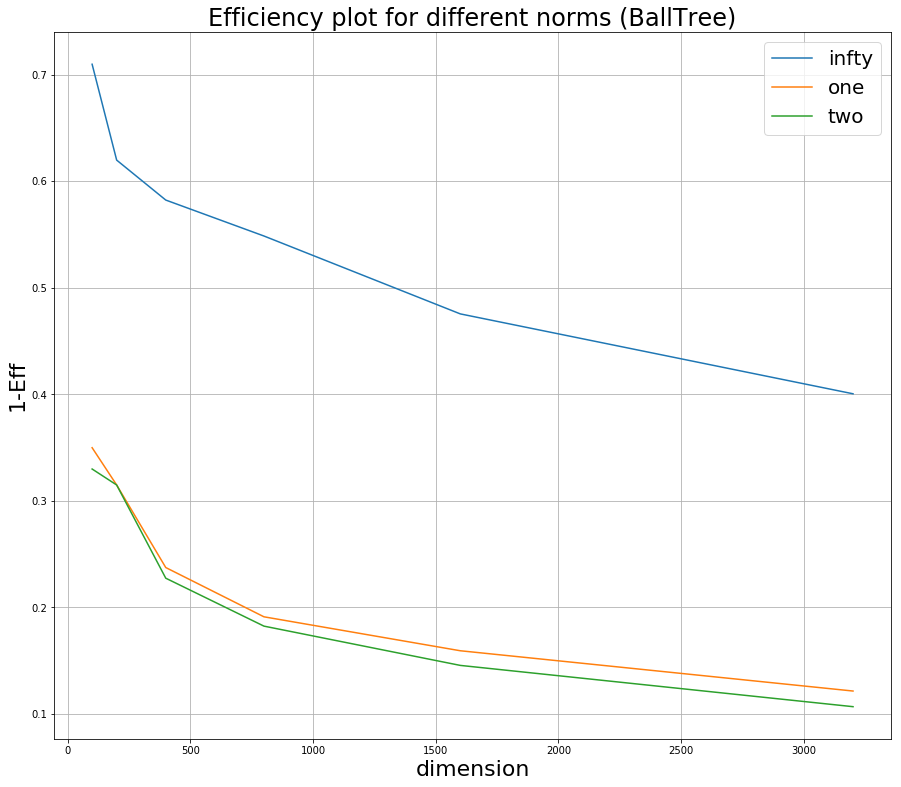

In [256]:
N_dim = [100,200,400,800,1600,3200]
plt.figure(figsize=(15,13))

p1 = plt.plot(N_dim, eff_balltree[:,0])
p2 = plt.plot(N_dim, eff_balltree[:,1])
p3 = plt.plot(N_dim, eff_balltree[:,2])

plt.grid()
plt.title('Efficiency plot for different norms (BallTree)', fontsize=24)
plt.xlabel('dimension', fontsize=22)
plt.ylabel('1-Eff', fontsize=22)
plt.legend((p1[0], p2[0], p3[0]), ('infty', 'one', 'two'), fontsize=20) 

In order to use the BallTree with the last two implemented norms ($d_{H^1}$ and $d_{MA}$) I need to rewrite the distance functions in order to have as the arguments just the two arrays on which to compute the distance. Unfortunately, these functions have a worse performance with respect to the previous one. However, the BallTree allows a much more faster access to the data.

In [257]:
def d_h_images(image1, image2):   
    norm_a = scipy.integrate.simps(image1)
    norm_b = scipy.integrate.simps(image2)
    
    a = np.divide(image1,norm_a)
    b = np.divide(image2,norm_b)
    
    diff = a-b
    grad_x = np.gradient(diff)
    first = square(grad_x)
    second = square(diff)
    
    return sqrt(integrate.simps(first + second))

In [258]:
def d_MA_images(image1, image2):
    
    n=28
    tol = 10e-08
    
    norm_a = scipy.integrate.simps(image1)
    norm_b = scipy.integrate.simps(image2)
    
    a = np.divide(image1,norm_a)
    b = np.divide(image2,norm_b)
    
    f = a-b
    sum_ab = a + b
    
    phi = np.empty([n,n])
    phi[:,0] = phi[:,-1] = phi[0,:] = phi[-1,:] = 0
    phi = phi.reshape(n*n)
    
    A = np.zeros([n*n,n*n])
    a = -np.ones((n*n-1,))
    b = 4*np.ones((n*n,))
    c = -np.ones((n*(n-1),))
    A = (diag(a, -1) + diag(b, 0) + diag(a, +1) + diag(c, +n) + diag(c, -n))
    
    phi = scipy.sparse.linalg.cg(A, f, tol=tol)
    
    lap = phi[0]
    
    grad_x = np.gradient(lap)
    
    integ = sum_ab*(square(grad_x))
    
    return scipy.integrate.simps(integ)

Unfortunately, the algorithm takes a large amount of time to compute the efficiencis for the requested dimensions. Since I was already out of time, I was not able to collect these data. I did some runs with smaller samples and I will report these data. It's clear that a further optimization of the code is requested in addition to a better analysis of the performances.

In [222]:
N_dim2 = [10,20,40,80,100]
metrics2 = [d_h_images, d_MA_images] 

eff2 = np.empty([len(N_dim2), len(metrics2)])

for i,dim in enumerate(N_dim2):
    print('Starting dim:', dim)
    for j,metric in enumerate(metrics2):
        print('Starting metric:', metric)
        tree = tree_cr(dim, x_train, metric)
        eff2[i,j] = eff_query(dim, tree, x_test, y_test, y_train)

Starting dim: 10
Starting metric: <function d_h_images at 0x7f359c813620>
Starting metric: <function d_MA_images at 0x7f359c7bce18>
Starting dim: 20
Starting metric: <function d_h_images at 0x7f359c813620>
Starting metric: <function d_MA_images at 0x7f359c7bce18>
Starting dim: 40
Starting metric: <function d_h_images at 0x7f359c813620>
Starting metric: <function d_MA_images at 0x7f359c7bce18>
Starting dim: 80
Starting metric: <function d_h_images at 0x7f359c813620>
Starting metric: <function d_MA_images at 0x7f359c7bce18>
Starting dim: 100
Starting metric: <function d_h_images at 0x7f359c813620>
Starting metric: <function d_MA_images at 0x7f359c7bce18>


In [223]:
print(eff2)

[[0.7    0.9   ]
 [0.55   0.8   ]
 [0.5    0.65  ]
 [0.3125 0.525 ]
 [0.28   0.51  ]]


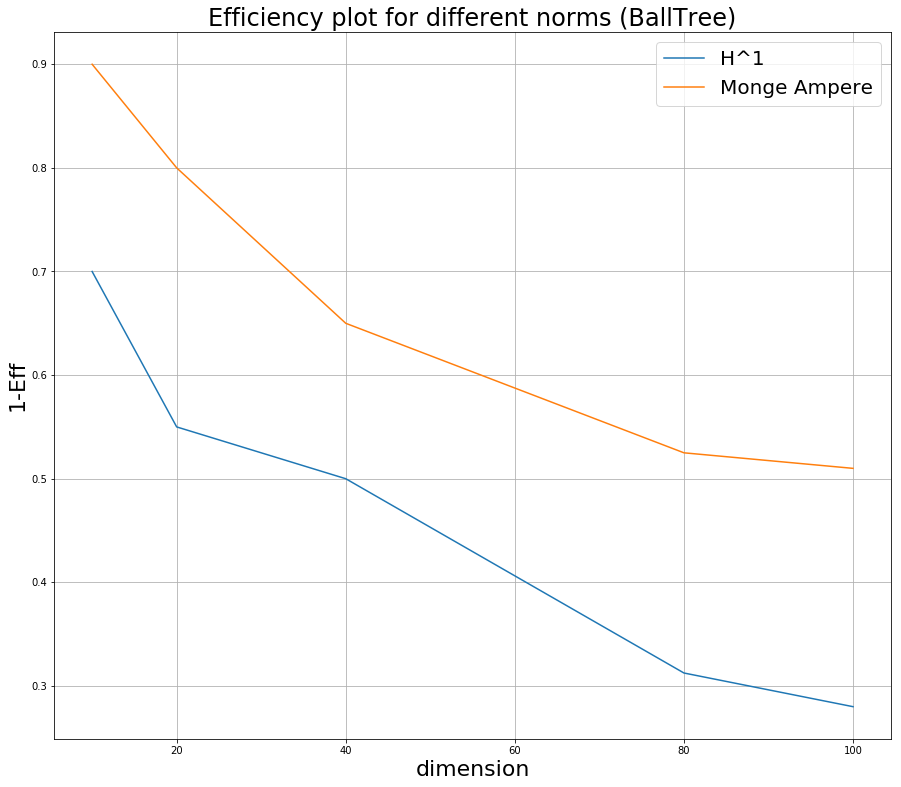

In [259]:
N_dim2 = [10,20,40,80,100]
plt.figure(figsize=(15,13))

p1 = plt.plot(N_dim2, eff2[:,0])
p2 = plt.plot(N_dim2, eff2[:,1])

plt.grid()
plt.title('Efficiency plot for different norms (BallTree)', fontsize=24)
plt.xlabel('dimension', fontsize=22)
plt.ylabel('1-Eff', fontsize=22)
plt.legend((p1[0], p2[0]), ('H^1', 'Monge Ampere'), fontsize=20) 

The high error on the first two runs is due to the fact that the sample is too small for the algorith to classify the image. However, even from these small runs the code seems to work. However, a better study with a higher number of queries is mandatory in order to be able to infere something from the efficiency plot. This study can be performed following exactly the same steps that have been showed. 